In [1]:
# Load necessary libraries
library(ggplot2)
library(caret)

# Load the iris dataset
data(iris)

# View first few rows
head(iris)


Loading required package: lattice



,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [2]:
print(iris)

    Sepal.Length Sepal.Width Petal.Length Petal.Width    Species
1            5.1         3.5          1.4         0.2     setosa
2            4.9         3.0          1.4         0.2     setosa
3            4.7         3.2          1.3         0.2     setosa
4            4.6         3.1          1.5         0.2     setosa
5            5.0         3.6          1.4         0.2     setosa
6            5.4         3.9          1.7         0.4     setosa
7            4.6         3.4          1.4         0.3     setosa
8            5.0         3.4          1.5         0.2     setosa
9            4.4         2.9          1.4         0.2     setosa
10           4.9         3.1          1.5         0.1     setosa
11           5.4         3.7          1.5         0.2     setosa
12           4.8         3.4          1.6         0.2     setosa
13           4.8         3.0          1.4         0.1     setosa
14           4.3         3.0          1.1         0.1     setosa
15           5.8         

In [3]:
# Check for missing values
sum(is.na(iris))

# View structure of dataset
str(iris)


[1] 0

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


             Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length    1.0000000  -0.1175698    0.8717538   0.8179411
Sepal.Width    -0.1175698   1.0000000   -0.4284401  -0.3661259
Petal.Length    0.8717538  -0.4284401    1.0000000   0.9628654
Petal.Width     0.8179411  -0.3661259    0.9628654   1.0000000


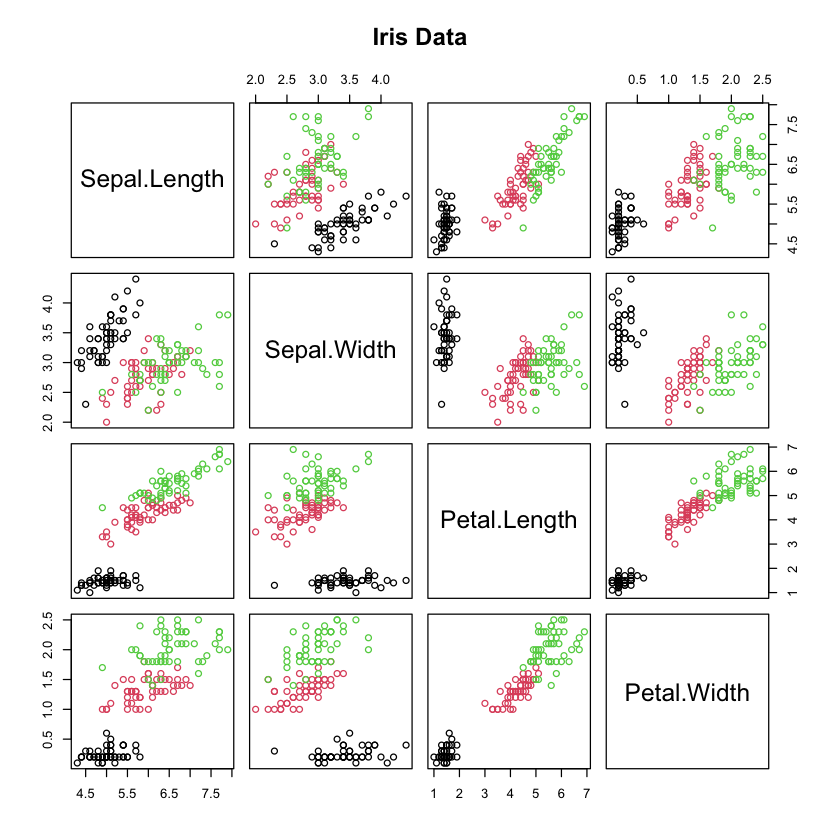

In [4]:
# Scatter plot matrix
pairs(iris[,1:4], main="Iris Data", col=iris$Species)

# Correlation heatmap
cor_matrix <- cor(iris[,1:4])
print(cor_matrix)


In [5]:
set.seed(123)  # For reproducibility
index <- createDataPartition(iris$Petal.Width, p = 0.8, list = FALSE)
train_data <- iris[index,]
test_data <- iris[-index,]


In [6]:
# Fit linear model
model <- lm(Petal.Width ~ Sepal.Length + Sepal.Width + Petal.Length, data=train_data)

# View model summary
summary(model)



Call:
lm(formula = Petal.Width ~ Sepal.Length + Sepal.Width + Petal.Length, 
    data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.40630 -0.09622 -0.01817  0.10606  0.60382 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.17414    0.19821  -0.879    0.381    
Sepal.Length -0.25189    0.05465  -4.609 1.03e-05 ***
Sepal.Width   0.25624    0.05391   4.754 5.70e-06 ***
Petal.Length  0.55177    0.02879  19.164  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1892 on 118 degrees of freedom
Multiple R-squared:  0.9409,	Adjusted R-squared:  0.9394 
F-statistic: 626.2 on 3 and 118 DF,  p-value: < 2.2e-16


In [7]:
# Predict on test data
predictions <- predict(model, newdata=test_data)

# Compare actual vs predicted values
results <- data.frame(Actual = test_data$Petal.Width, Predicted = predictions)
print(results)


    Actual  Predicted
1      0.2 0.21053284
2      0.2 0.13279006
7      0.3 0.31085503
17     0.4 0.18228506
19     0.3 0.30180087
21     0.2 0.27487166
25     0.2 0.53636139
30     0.2 0.34477117
36     0.2 0.04849533
51     1.4 1.47590414
60     1.4 1.35977412
68     1.0 1.31899234
85     1.5 1.71733029
88     1.3 1.25607976
90     1.3 1.28813468
91     1.2 1.53446692
99     1.1 0.83712195
100    1.3 1.36980591
101    2.5 2.39515433
102    1.9 1.87076224
105    2.2 2.15754894
113    2.1 1.91645010
118    2.2 2.55686452
128    1.8 1.76171320
135    1.4 2.04545504
138    1.8 2.04283154
143    1.9 1.87076224
150    1.8 1.92244577


In [8]:
# Calculate RMSE (Root Mean Squared Error)
rmse <- sqrt(mean((test_data$Petal.Width - predictions)^2))
print(paste("RMSE:", rmse))

# R-squared value
r_squared <- summary(model)$r.squared
print(paste("R-squared:", r_squared))


[1] "RMSE: 0.209307985465153"
[1] "R-squared: 0.940895400001566"


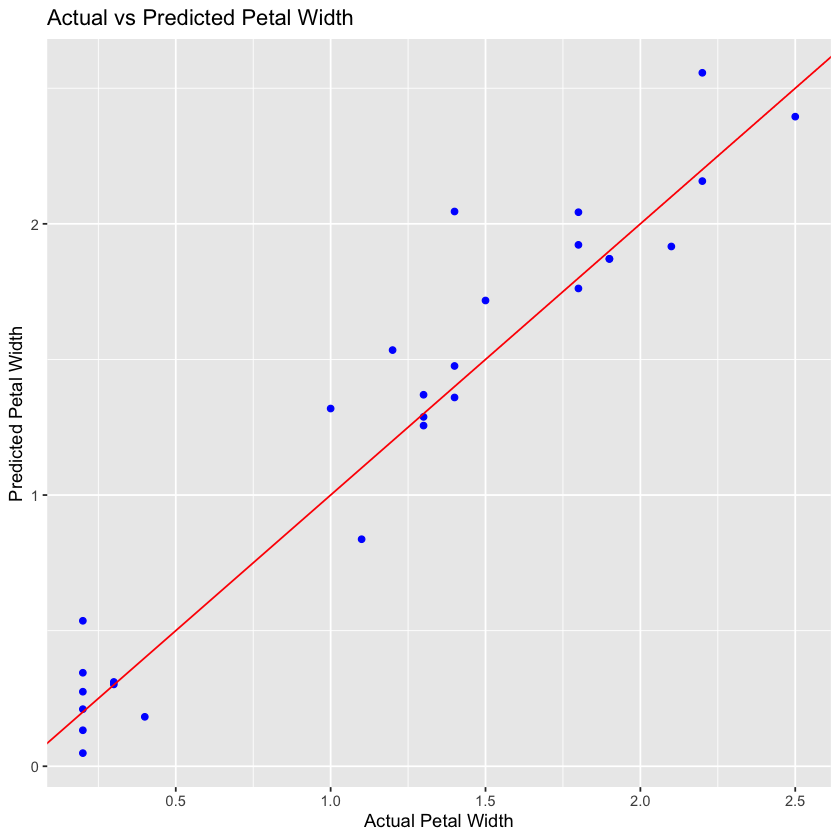

In [9]:
ggplot(data=test_data, aes(x=Petal.Width, y=predictions)) +
  geom_point(color='blue') +
  geom_abline(slope=1, intercept=0, color="red") +
  ggtitle("Actual vs Predicted Petal Width") +
  xlab("Actual Petal Width") +
  ylab("Predicted Petal Width")
